In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [21]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';') # TODO: Load CSV with correct separator

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    df_encoded = df.copy()
    for col in categorical_cols:
        if col in df_encoded.columns: # Check if col exists
            df_encoded[col] = le.fit_transform(df_encoded[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X_features = df_encoded[features] # TODO: Select features

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_features) # TODO: Apply StandardScaler

    # Return unscaled features for correlation plot
    return X_scaled, X_features, df

# Load and preprocess the data
# We now capture X_features for the correlation plot
X_scaled, X_features, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


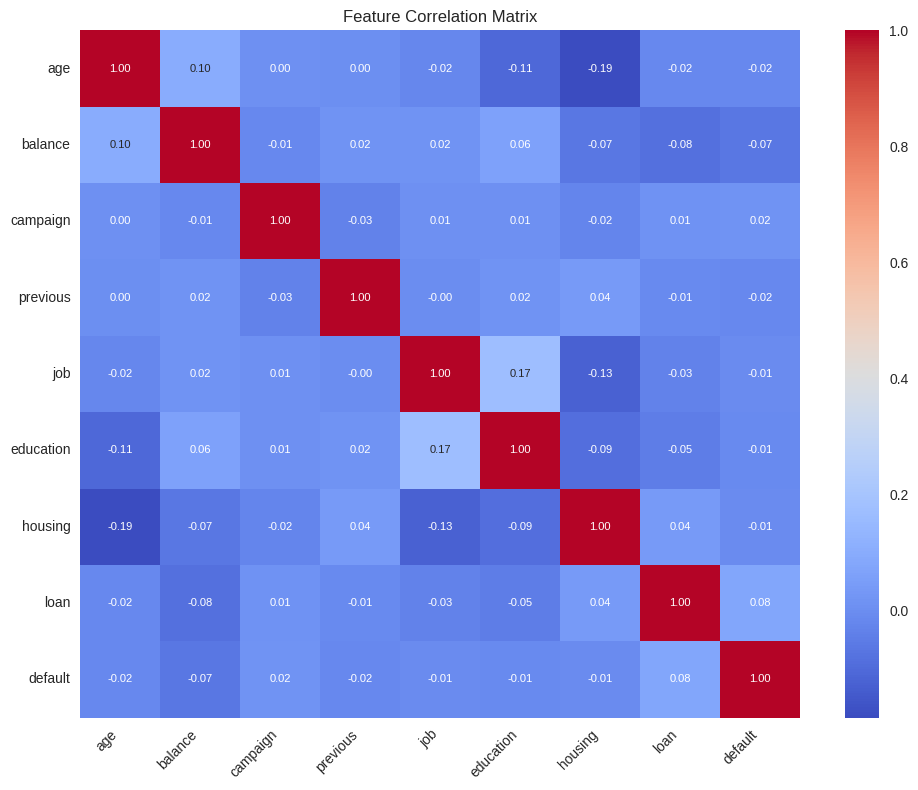

In [22]:
# --- New Cell for PDF Requirement 1 ---
# 1. Feature Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_features.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        # Set random seed for reproducibility
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        # Get random, unique indices
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.zeros((X.shape[0], self.n_clusters))

        # Calculate Euclidean distance from each point to each centroid
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - self.centroids[k], axis=1)

        # Return the index (cluster) of the minimum distance for each point
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))

        for k in range(self.n_clusters):
            # Get all points assigned to the current cluster k
            cluster_points = X[labels == k]

            # Check if the cluster has any points
            if len(cluster_points) > 0:
                # Calculate the new centroid as the mean of the cluster points
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                # Handle empty cluster: keep the old centroid
                # This is a point for discussion in the report
                new_centroids[k] = self.centroids[k]

        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        # 1. Initialize centroids
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            # 2. E-step: Assign clusters
            labels = self._assign_clusters(X)

            # Store current centroids for convergence check
            old_centroids = self.centroids

            # 3. M-step: Update centroids
            new_centroids = self._update_centroids(X, labels)

            # 4. Check for convergence
            if np.allclose(old_centroids, new_centroids):
                break

            self.centroids = new_centroids

        # Store final labels and centroids
        self.labels = self._assign_clusters(X)
        self.centroids = self.centroids

        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

Variance captured by first component: 14.88%
Variance captured by second component: 13.24%
Total variance captured by first two components: 28.12%


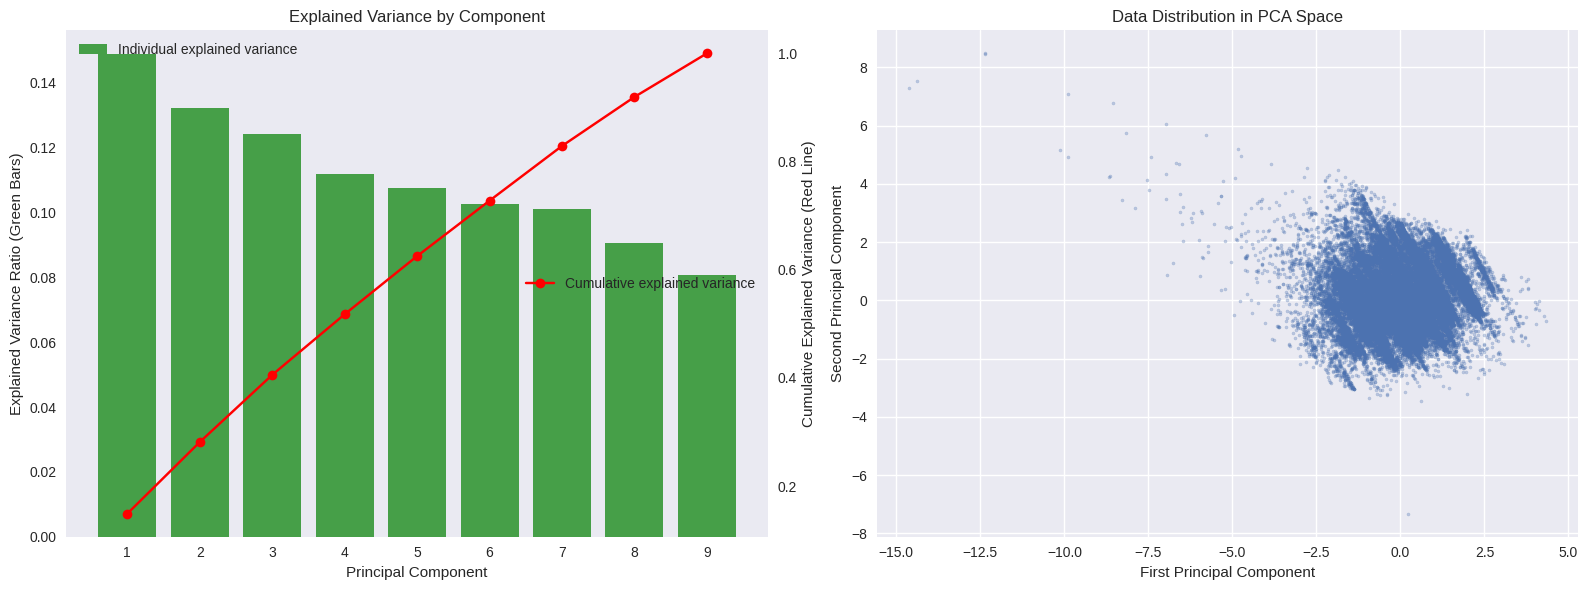

Shape after PCA: (45211, 2)


In [27]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # --- PDF Requirement 2: Explained Variance & PCA Distribution ---

    # TODO: Create visualization
    plt.figure(figsize=(16, 6))

    # Plot explained variance
    # Your code here
    # We fit a separate PCA with all components to get the full variance picture
    pca_full = PCA().fit(X)
    explained_variance_ratio = pca_full.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)
    components = range(1, len(explained_variance_ratio) + 1)

    # Plot 1: Explained Variance by Component
    ax1 = plt.subplot(1, 2, 1)
    ax1.bar(components, explained_variance_ratio, alpha=0.7,
            label='Individual explained variance', color='g')
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio (Green Bars)')
    ax1.set_title('Explained Variance by Component')
    ax1.set_xticks(components)

    # Create a twin axis for the cumulative plot
    ax2 = ax1.twinx()
    ax2.plot(components, cumulative_variance, 'r-o',
             label='Cumulative explained variance')
    ax2.set_ylabel('Cumulative Explained Variance (Red Line)')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='center right')
    ax1.grid(False)
    ax2.grid(False)

    # Print variance captured by first two components (for report Q )
    print(f"Variance captured by first component: {explained_variance_ratio[0]:.2%}")
    print(f"Variance captured by second component: {explained_variance_ratio[1]:.2%}")
    print(f"Total variance captured by first two components: {cumulative_variance[1]:.2%}")

    # Plot 2: Data in 2D
    # Your code here
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, s=5)
    plt.title('Data Distribution in PCA Space')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

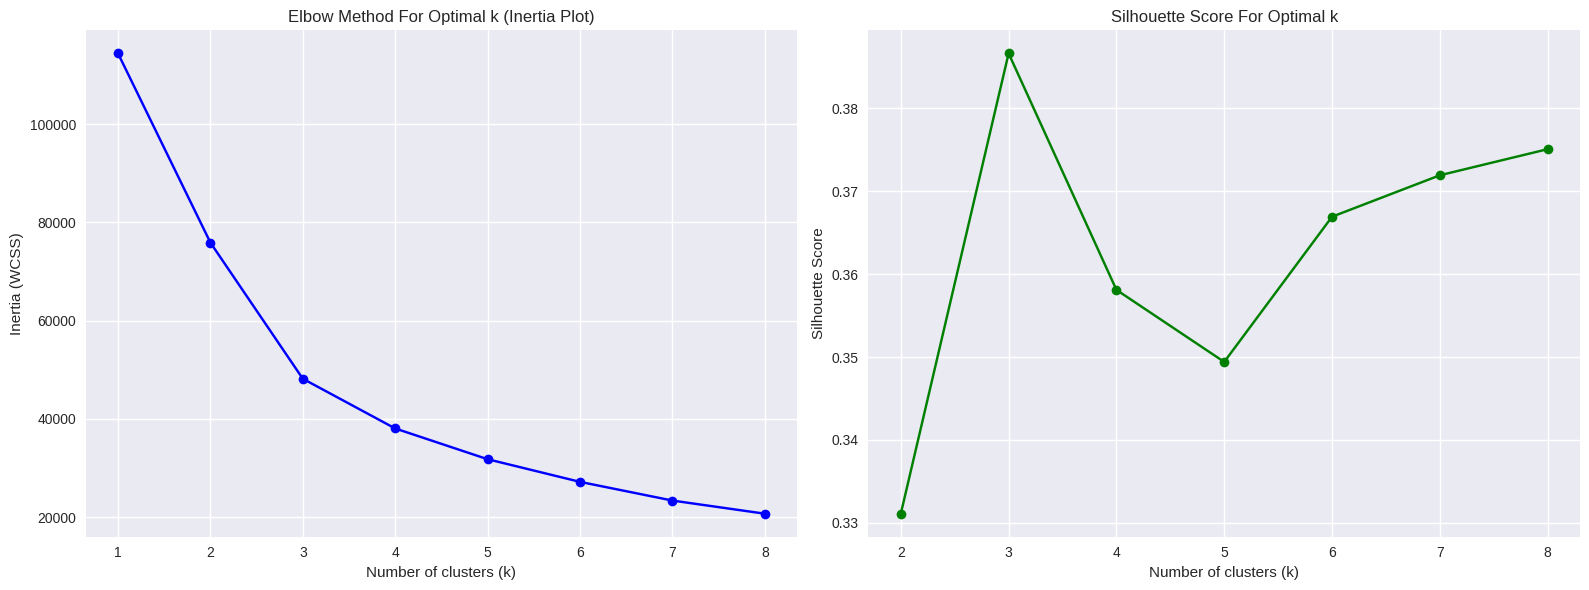

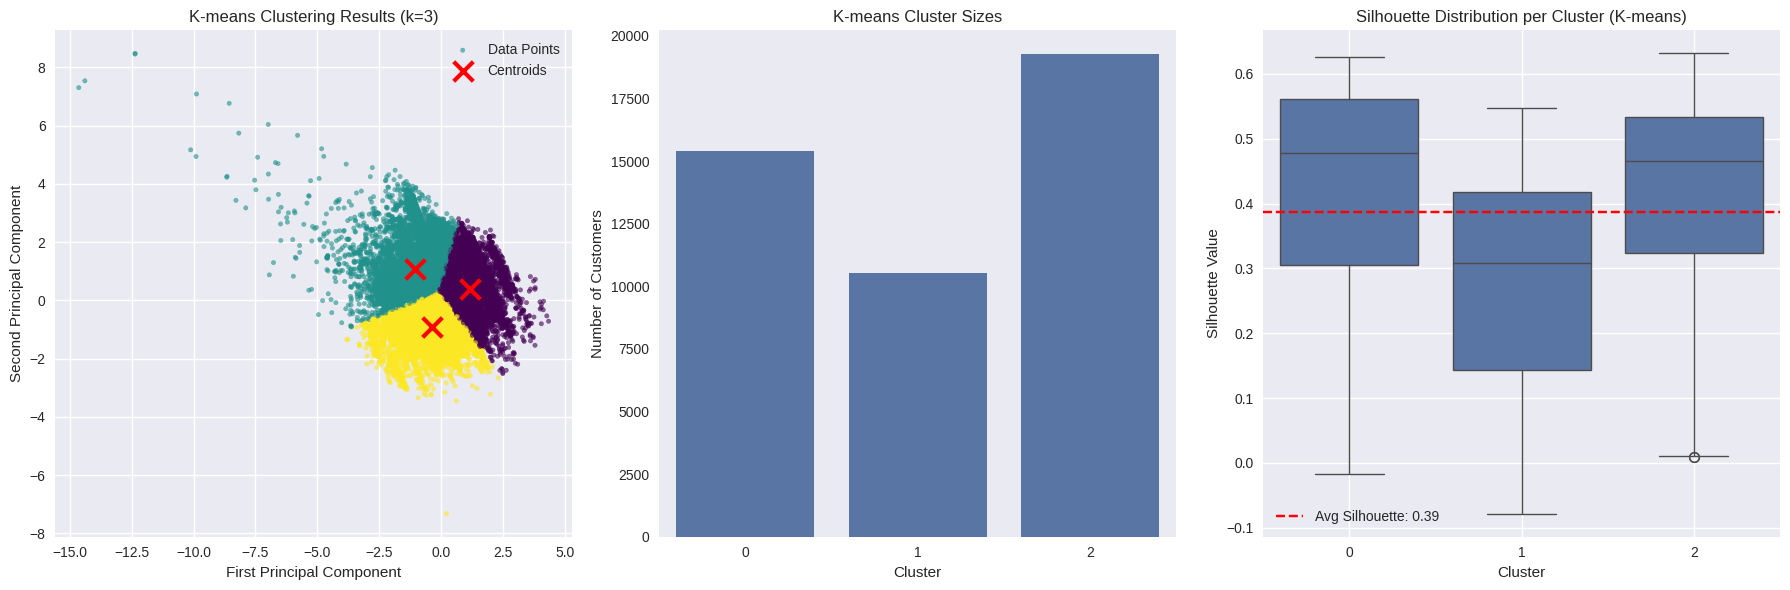


K-means Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [28]:
# Import silhouette_samples for the box plot
from sklearn.metrics import silhouette_samples

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for k in range(len(centroids)):
        # Get all points in this cluster
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            # Sum of squared distances from points to their centroid
            inertia += np.sum((cluster_points - centroids[k])**2)

    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve and silhouette scores to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    5. (Added) Calculate and plot silhouette score for each k
    """
    # Your code here
    inertias = []
    silhouette_scores = []

    # Note: K must start from 2 for silhouette score
    K_silhouette = range(2, max_k + 1)
    K_inertia = range(1, max_k + 1)

    # Calculate inertia for different k values
    # Your code here
    for k in K_inertia:
        kmeans_model = KMeansClustering(n_clusters=k, random_state=42).fit(X)
        labels = kmeans_model.labels
        centroids = kmeans_model.centroids

        # Calculate inertia
        inertias.append(calculate_inertia(X, labels, centroids))

        # Calculate silhouette score (only for k >= 2)
        if k >= 2:
            silhouette_scores.append(silhouette_score(X, labels))

    # --- PDF Requirement 3: Inertia & Silhouette Plots ---

    # Create elbow plot
    # Your code here
    plt.figure(figsize=(16, 6))

    # Plot 1: Inertia (Elbow) Plot
    plt.subplot(1, 2, 1)
    plt.plot(K_inertia, inertias, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.title('Elbow Method For Optimal k (Inertia Plot)')
    plt.xticks(K_inertia)
    plt.grid(True)

    # Plot 2: Silhouette Score Plot
    plt.subplot(1, 2, 2)
    plt.plot(K_silhouette, silhouette_scores, 'go-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score For Optimal k')
    plt.xticks(K_silhouette)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouette_scores

# Try different numbers of clusters
inertias, silhouette_scores = plot_elbow_curve(X_pca, max_k=8)

# --- Based on plots, let's assume optimal k=3 ---
# (The elbow is around 3, and silhouette score is high at 3)
OPTIMAL_K = 3

# Apply final clustering
kmeans = KMeansClustering(n_clusters=OPTIMAL_K, random_state=42)
kmeans.fit(X_pca)
kmeans_labels = kmeans.labels
kmeans_centroids = kmeans.centroids

# --- PDF Requirement 4: K-means Results (3 plots) ---

plt.figure(figsize=(18, 6))

# Plot 1: K-means Clustering Results with Centroids [cite: 122]
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis',
            alpha=0.6, s=10, label='Data Points')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids', linewidth=3)
plt.title(f'K-means Clustering Results (k={OPTIMAL_K})')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)

# Plot 2: K-means Cluster Sizes [cite: 126]
plt.subplot(1, 3, 2)
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('K-means Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')

# Plot 3: Silhouette Distribution per Cluster [cite: 127]
plt.subplot(1, 3, 3)
sample_silhouette_values = silhouette_samples(X_pca, kmeans_labels)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Silhouette Value': sample_silhouette_values,
    'Cluster': kmeans_labels
})

sns.boxplot(x='Cluster', y='Silhouette Value', data=plot_data)

# Add average silhouette line
silhouette_avg = silhouette_score(X_pca, kmeans_labels)
plt.axhline(silhouette_avg, color="red", linestyle="--",
            label=f'Avg Silhouette: {silhouette_avg:.2f}')

plt.title('Silhouette Distribution per Cluster (K-means)')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans_labels, kmeans_centroids)
silhouette = silhouette_score(X_pca, kmeans_labels)

print("\nK-means Clustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

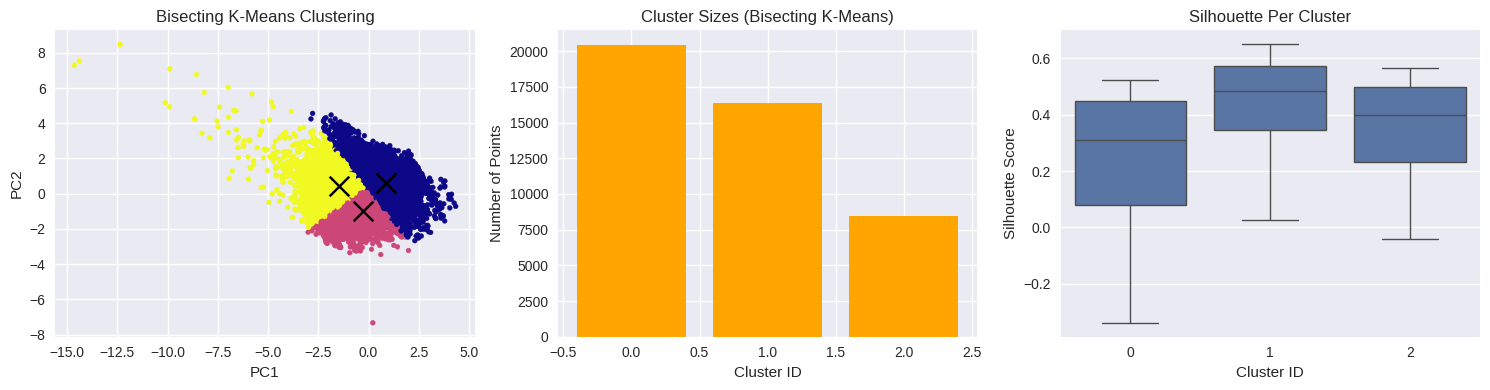


Bisecting K-Means Evaluation:
Silhouette Score: 0.33789411031538313


In [31]:
from sklearn.cluster import KMeans
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        # Start: all points belong to cluster 0
        self.labels_ = np.zeros(X.shape[0], dtype=int)

        # Next new cluster ID to assign
        next_label = 1

        # Continue splitting until we reach desired number of clusters
        while len(np.unique(self.labels_)) < self.n_clusters:

            # 1. Choose cluster to split = largest cluster
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            cluster_to_split = unique_labels[np.argmax(counts)]

            # Get indices for this cluster
            idx = np.where(self.labels_ == cluster_to_split)[0]
            X_subset = X[idx]

            # If cluster has 1 or 0 points, skip splitting
            if len(X_subset) <= 1:
                break

            # 2. Perform KMeans (k=2) on the subset
            km = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = km.fit_predict(X_subset)

            # Two child clusters: 0 and 1 inside the subset
            left_child = cluster_to_split        # keep old label
            right_child = next_label             # assign new label
            next_label += 1

            # 3. Assign labels back to main label array
            # Left child keeps the original label
            self.labels_[idx[sub_labels == 0]] = left_child

            # Right child gets a new label
            self.labels_[idx[sub_labels == 1]] = right_child

            # 4. Store tree + centroids
            self.split_tree[cluster_to_split] = (left_child, right_child)
            self.centers_[left_child] = km.cluster_centers_[0]
            self.centers_[right_child] = km.cluster_centers_[1]

        return self.labels_

# Bisecting K-Means Visualizations

# Run Bisecting KMeans
bkmeans = BisectingKMeans(n_clusters=3, random_state=42)
b_labels = bkmeans.fit_predict(X_pca)

# Convert centroids dictionary to array (sorted by cluster)
b_centroids = np.array([bkmeans.centers_[k] for k in sorted(bkmeans.centers_.keys())])

plt.figure(figsize=(15, 4))

# 1. Scatter Plot with Centroids
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=b_labels, cmap='plasma', s=12)
plt.scatter(b_centroids[:, 0], b_centroids[:, 1], c='black', marker='x', s=200)
plt.title("Bisecting K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

# 2. Cluster Size Bar Plot
plt.subplot(1, 3, 2)
unique, counts = np.unique(b_labels, return_counts=True)
plt.bar(unique, counts, color='orange')
plt.title("Cluster Sizes (Bisecting K-Means)")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Points")

# 3. Silhouette Distribution per Cluster
plt.subplot(1, 3, 3)
sil_vals = silhouette_samples(X_pca, b_labels)
sns.boxplot(x=b_labels, y=sil_vals)
plt.title("Silhouette Per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Print Evaluation Score
print("\nBisecting K-Means Evaluation:")
print("Silhouette Score:", silhouette_score(X_pca, b_labels))


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!